In [ ]:
#Membaca file csv
import pandas as pd
df =pd.read_csv('keinginanBeliProduk.csv',sep=';')

In [ ]:
df

,Text
0,tidak karena lagi hemat
1,Iya. Tertarik dengan benefit yg ditawarkan
2,Tidak
3,tidak
4,"tidak hehe,, tapi kalau aplikasi biasanya suda..."
...,...
67,"tidak, karena tidak perlu"
68,"Tergantung kebutuhan, jika kebetulan produk te..."
69,"Iya ,namun hanya angan angan"
70,"Tergantung... Kalo tertarik ya pakai, tapi kal..."


In [ ]:
df['Text']=df['Text'].str.replace('(?:\@|https?\://)\S+', '')
df['Text']=df['Text'].str.replace('[^\w\s]',' ')
#ilangin angka
df['Text']=df['Text'].str.replace('\d+',' ')
#ilangin enter
df['Text']=df['Text'].str.lower()
#ilangin spasi berlebih
df['Text'] = df['Text'].replace('\s+', ' ', regex=True)
#ilangin simbol
df['Text'] = df['Text'].replace('\n',' ',regex=True)

In [ ]:
df

,Text
0,tidak karena lagi hemat
1,iya tertarik dengan benefit yg ditawarkan
2,tidak
3,tidak
4,tidak hehe tapi kalau aplikasi biasanya sudah ...
...,...
67,tidak karena tidak perlu
68,tergantung kebutuhan jika kebetulan produk ter...
69,iya namun hanya angan angan
70,tergantung kalo tertarik ya pakai tapi kalo ba...


In [ ]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

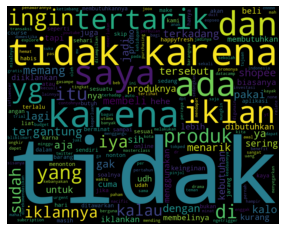

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [str (twts) for twts in df['Text']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
stop = {'sih','wkwk','hehe','haha','ya','kali','atau','nya','emmmm','mah','aja','di','beb','itu','kan'}
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df

,Text
0,tidak karena lagi hemat
1,iya tertarik dengan benefit yg ditawarkan
2,tidak
3,tidak
4,tidak tapi kalau aplikasi biasanya sudah pakai
...,...
67,tidak karena tidak perlu
68,tergantung kebutuhan jika kebetulan produk ter...
69,iya namun hanya angan angan
70,tergantung kalo tertarik pakai tapi kalo baran...


In [ ]:
df = df.rename(columns={'Text':'Alasan_Membeli_Produk'})

In [ ]:
df=df.dropna()

In [ ]:
slang = {"ga":"tidak", "gabut":"bosan", "ngelamun":"melamun", "karna":"karena", "mv":"music video", "interesting":"menarik","males":"malas","ku":"aku","ya kali":"mana mungkin","kalo":"kalau","biar":"agar", "nambah":"bertambah", "mikir":"dipikir", "gapake":"tidak pakai", "yg":"yang", "nggak":"tidak", "ngeskip":"melewati", "diskip":"dilewati","smpe":"sampai","kepo":"penasaran","klo":"kalau","soalnya":"karena","ngga":"tidak","udh":"udah","sampai":"hingga","jadi":"menjadi","kaya":"seperti","begini":"seperti ini","benefit":"keuntungan","mending":"lebih baik","ketimbang":"daripada","purchasing":"membeli","explore":"menjelajahi","ngetrigger":"menyebabkan saya","dpt":"dapat","pinjol":"peminjaman online","pas":"saat","per":"setiap","kalo":"kalau","liat":"melihat","nonton":"menonton","digunain":"digunakan","duit":"uang","yt":"youtube","doang":"aja","hp":"ponsel","apps":"aplikasi","tapi":"tetapi","pakai":"memakai","dr":"dari","gak":"tidak","enggak":"tidak","jadinya":"sehingga","gasampe":"tidak sampai","relate":"sesuai","of course":"tentu saja","cuma":"hanya","none":"tidak ada","urgent":"penting","kayak":"seperti","relate":"sesuai","paling":"mungkin","aja":"saja","udah":"sudah","make":"memakai","dapet":"dapat"}

In [ ]:
df['Alasan_Membeli_Produk'] = df['Alasan_Membeli_Produk'].apply(lambda x: ' '.join(slang.get(word, word) for word in x.split()))

In [ ]:
df

,Alasan_Membeli_Produk
0,tidak karena lagi hemat
1,iya tertarik dengan keuntungan yang ditawarkan
2,tidak
3,tidak
4,tidak tetapi kalau aplikasi biasanya sudah mem...
...,...
67,tidak karena tidak perlu
68,tergantung kebutuhan jika kebetulan produk ter...
69,iya namun hanya angan angan
70,tergantung kalau tertarik memakai tetapi kalau...


In [ ]:
#Menyimpan file
df.to_csv('sudahDiTambahStopword.csv',columns=['Alasan_Membeli_Produk'],index=False)